In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import stephane.display.graphes as graphes

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


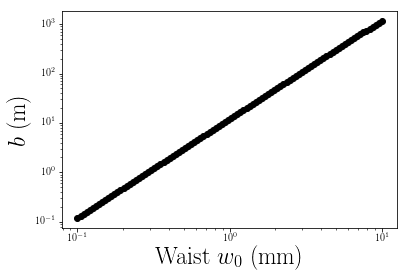

{1: {'data': {}, 'fignum': 'b_m_vs_Waistw_0_mm'}}

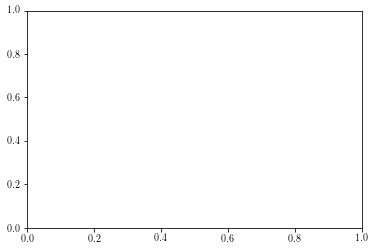

In [6]:
l0 = 532*10**-9
w0 = np.logspace(-4,-2,100)
b = 2*np.pi*w0**2/l0
plt.loglog(w0*10**3,b,'ko')
graphes.legende('Waist $w_0$ (mm)','$b$ (m)','')

In [4]:
folder = '/Users/stephane/Documents/Postdoc_Princeton/Balloon/Crack_opening/20170808_fps20k/'
D_0 = proc.load(folder,step=1)

In [5]:
fsave = './Processing_Crack/D2500minch'

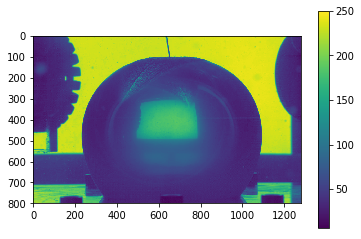

In [6]:
fx = 0.0974
dt = 0.05
plt.imshow(np.transpose(D_0['im'][20,:,:]))
plt.colorbar()

In [7]:
(x0,y0) = (522,176)
(x1,y1) = (600,271)

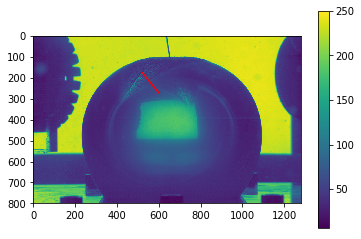

In [8]:
i=20
plt.imshow(np.transpose(D_0['im'][i,:,:]))
plt.plot([x0,x1],[y0,y1],'r')
plt.colorbar()

In [331]:
(x0,y0) = (522,176)
(x1,y1) = (600,271)

5.46653754519392
0.9074096773669827
5.857899778736533
1.382406648741236
Data not saved


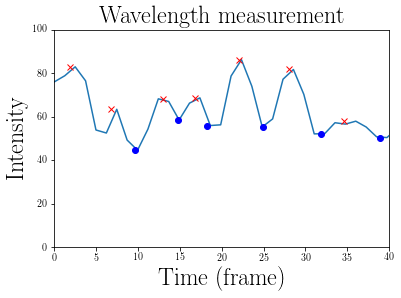

In [343]:
i = 20
(nt,nx,ny) = D_0['im'].shape
x = np.arange(nx)
y = np.arange(ny)
f = scipy.interpolate.RectBivariateSpline(x,y,D_0['im'][i,:,:], bbox=[None, None, None, None], kx=3, ky=3, s=0)
N=100
t = np.linspace(0,1,N)
xi = x0 + t*(x1-x0)
yi = y0 + t*(y1-y0)
L = np.sqrt((x1-x0)**2+(y1-y0)**2)

s = t*L

val = np.squeeze([f(x,y) for (x,y) in zip(xi,yi)])
plt.plot(s,val)

imax = max_local2(val,n=2)
smax = np.asarray([subpix(val,i,a=2)*L/N for i in imax])
plt.plot(smax,val[imax],'rx')

imin = min_local2(val,n=2)
smin = np.asarray([subpix(val,i,a=2)*L/N for i in imin])
plt.plot(smin,val[imin],'bo')

s0 = 40 #position de la borne sup. Dépend du temps considéré
lmax = np.diff(smax[smax<s0])
lmin = np.diff(smin[smin<s0])

l1 =np.mean(lmax)
stdl1 = np.std(lmax)

l2 = np.mean(lmin)
stdl2 = np.std(lmin)

print(l1)
print(stdl1)
print(l2)
print(stdl2)

figs = graphes.legende('Time (frame)','Intensity','Wavelength measurement',cplot=True,show=False)
plt.axis([0,s0,0,100])
graphes.save_figs(figs,savedir=fsave,prefix='100mus')#print(np.diff(smax[smax<s0]))
#print(np.diff(smin)[smax<s0])

In [337]:
g = [296,506,547,140]
p = [353,538,833,214]

Data not saved


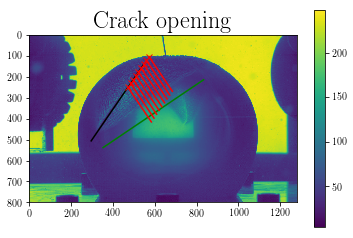

In [346]:
#def line_generator(g,p):
pL = np.sqrt((p[2]-p[0])**2+(p[3]-p[1])**2)
t = np.asarray([p[2]-p[0],p[3]-p[1]])/pL
n = [-t[1],t[0]]

i=25
plt.imshow(np.transpose(D_0['im'][i,:,:]))
#plt.plot([x0,x1],[y0,y1],'r')
plt.colorbar()
L = 200
plt.plot([g[0],g[2]],[g[1],g[3]],'k')
plt.plot([p[0],p[2]],[p[1],p[3]],'g')

positions = np.arange(0.7,1.1,0.05)
N = len(positions)
call=[dict() for i in range(N)]

for i,t in enumerate(positions):
    x0 = g[0] + t*(g[2]-g[0])
    y0 = g[1] + t*(g[3]-g[1])

    plt.plot(x0,y0,'rx')
    x1 = x0 + L*n[0]
    y1 = y0 + L*n[1]

    plt.plot([x0,x1],[y0,y1],'r')
    
    call[i]['g']=[x0,x1,y0,y1]
    call[i]['L']=L
    
figs = graphes.legende('','','Crack opening',cplot=True,show=False)
graphes.save_figs(figs,savedir=fsave,suffix='2')

Data not saved


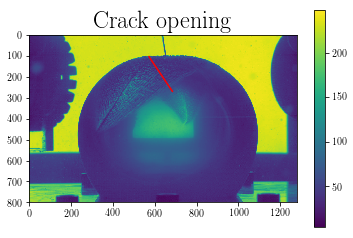

In [329]:
i=25
plt.imshow(np.transpose(D_0['im'][i,:,:]))
#plt.plot([x0,x1],[y0,y1],'r')
plt.colorbar()

# example
c = dict()
c['g']=[0]*4
(c['g'][0],c['g'][2]) = (522,176)  # Line 1
(c['g'][1],c['g'][3]) = (600,271)

plt.plot([x0,x1],[y0,y1],'r')
figs = graphes.legende('','','Crack opening',cplot=True,show=False)
graphes.save_figs(figs,savedir=fsave,prefix='Example')

Data not saved


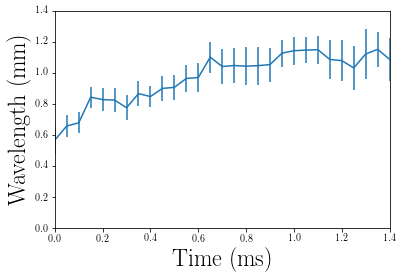

In [333]:
tlist = range(22,60)
slist = [30,50,65,80]+[100]*(len(tlist)-4)


# example
c = dict()
c['g']=[0]*4
(c['g'][0],c['g'][2]) = (522,176)  # Line 1
(c['g'][1],c['g'][3]) = (600,271)

#c = call[5]
La = []
stdLa = []
for (t,s0) in zip(tlist,slist):
    (l,stdl) = compute_wavelength(D_0,c,t,s0)
    
    La.append(l)
    stdLa.append(stdl)
    
t0 = min(tlist)
t = (np.asarray(tlist)-t0)*dt
La = np.asarray(La)*fx
stdLa = np.asarray(stdLa)*fx

plt.errorbar(t,La,stdLa)
plt.axis([0,1.4,0,1.4])
figs = {}
figs.update(graphes.legende('Time (ms)','Wavelength (mm)','',show=False))
graphes.save_figs(figs,savedir=fsave)

{'L': 200, 'g': [471.7, 583.5945710002125, 249.8, 415.56973481512966]}
Data not saved
{'L': 200, 'g': [484.25, 596.1445710002125, 231.5, 397.26973481512965]}
Data not saved
Data not saved
{'L': 200, 'g': [496.8, 608.6945710002126, 213.2, 378.96973481512964]}
Data not saved
Data not saved
Data not saved
{'L': 200, 'g': [509.35, 621.2445710002125, 194.89999999999998, 360.66973481512963]}
Data not saved
Data not saved
Data not saved
Data not saved
{'L': 200, 'g': [521.9000000000001, 633.7945710002126, 176.59999999999997, 342.3697348151296]}
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
{'L': 200, 'g': [534.45, 646.3445710002126, 158.29999999999995, 324.0697348151296]}
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
{'L': 200, 'g': [547.0, 658.8945710002125, 139.99999999999994, 305.7697348151296]}
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
Data not saved
{'L': 200, 'g': [55

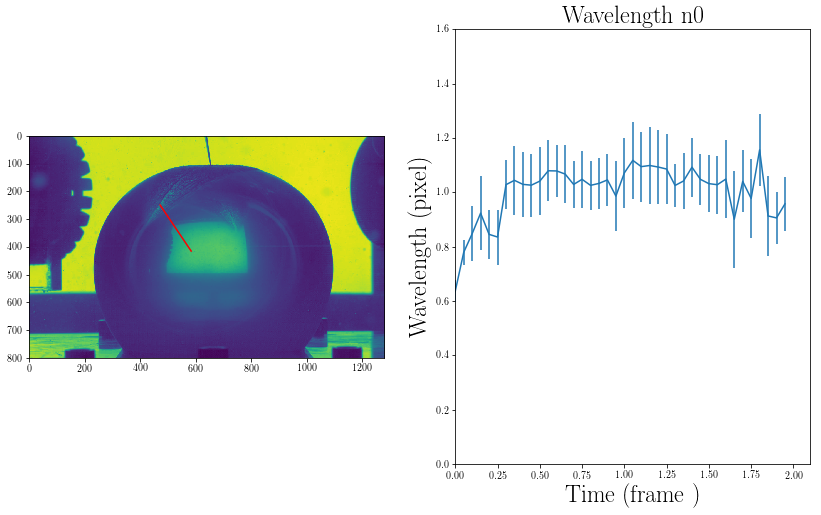

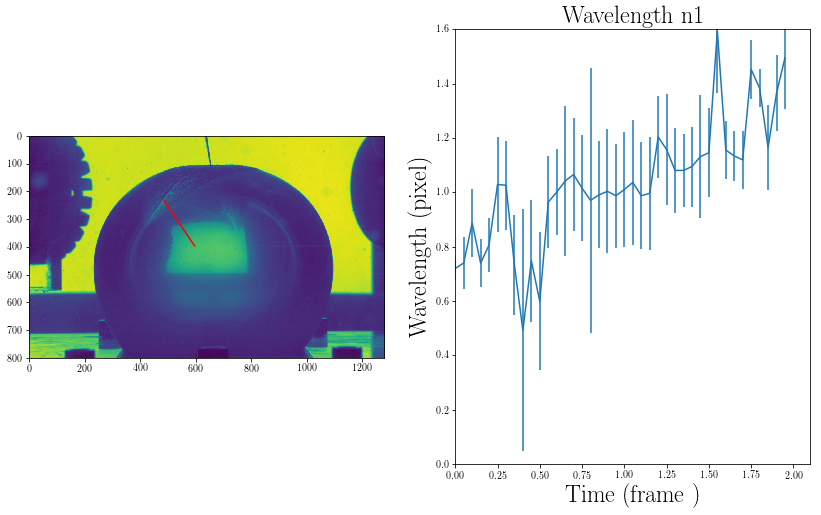

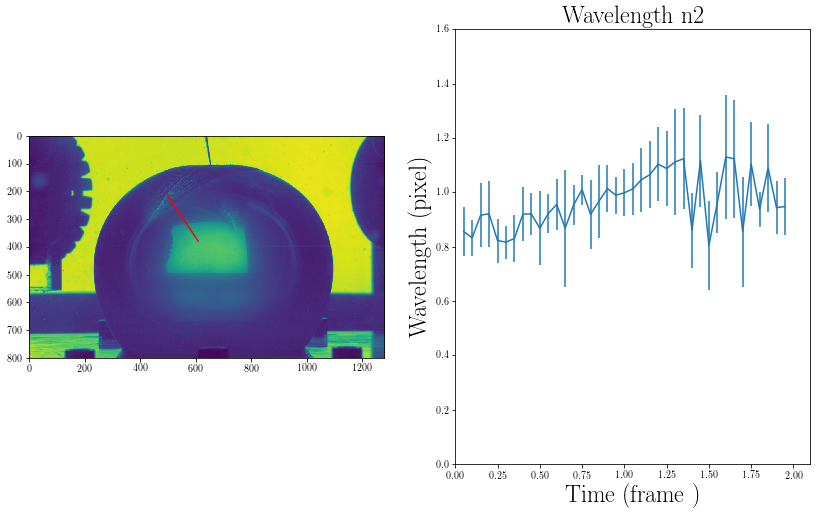

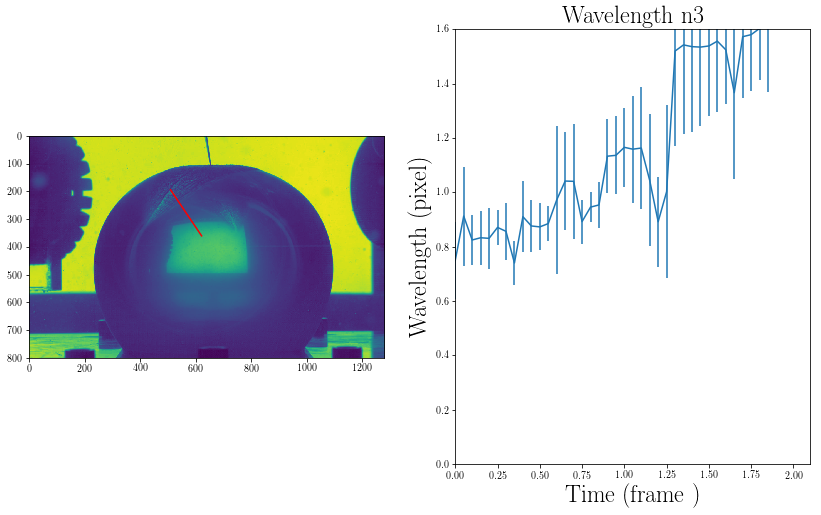

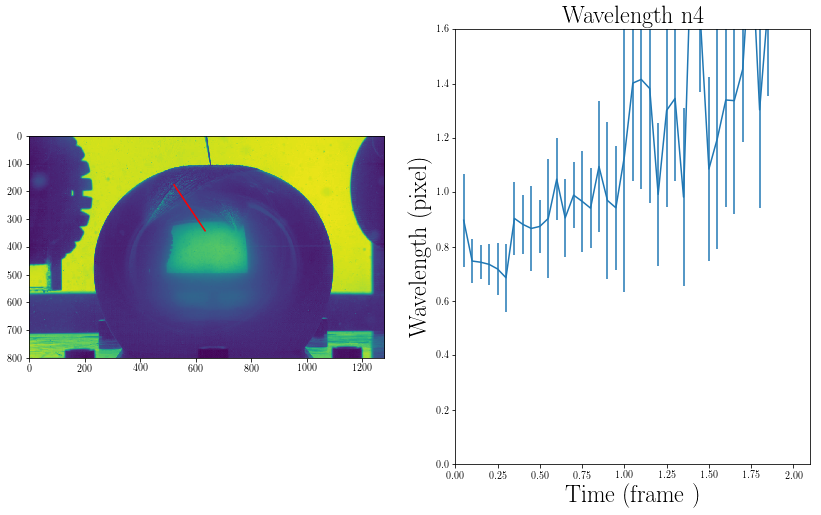

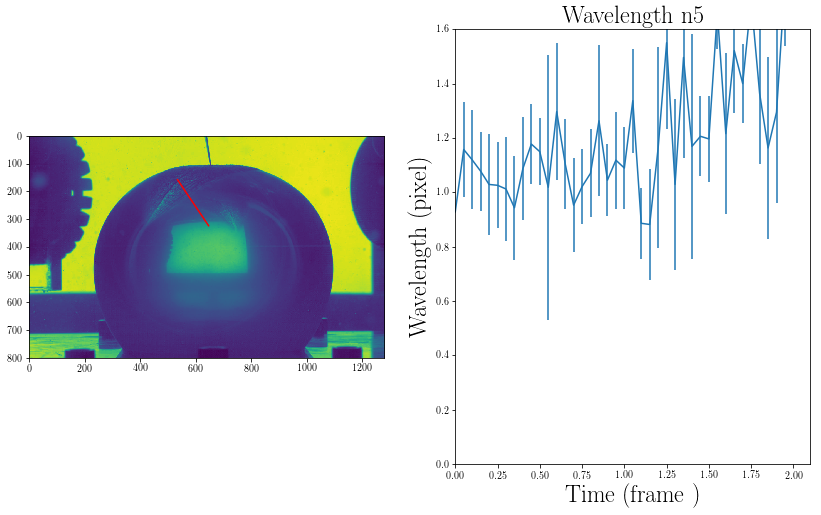

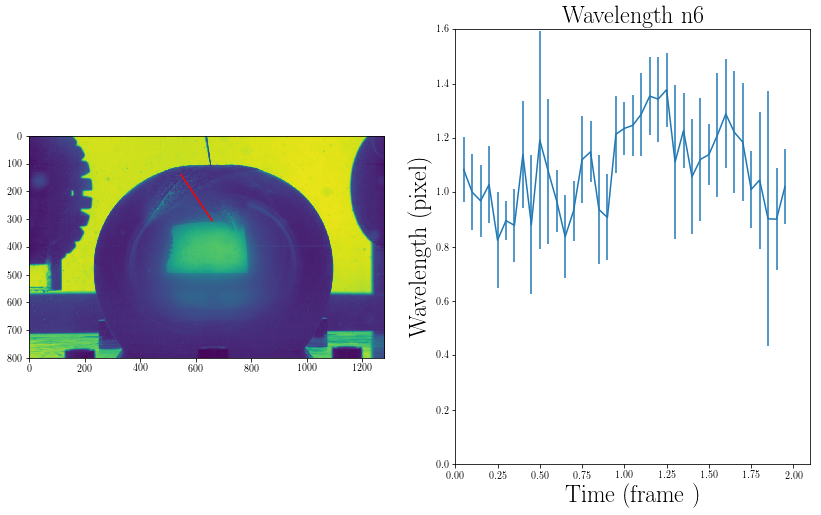

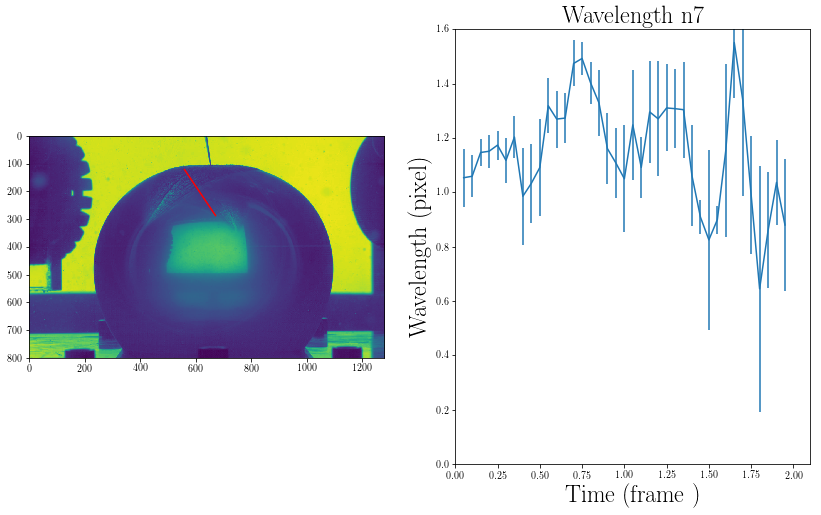

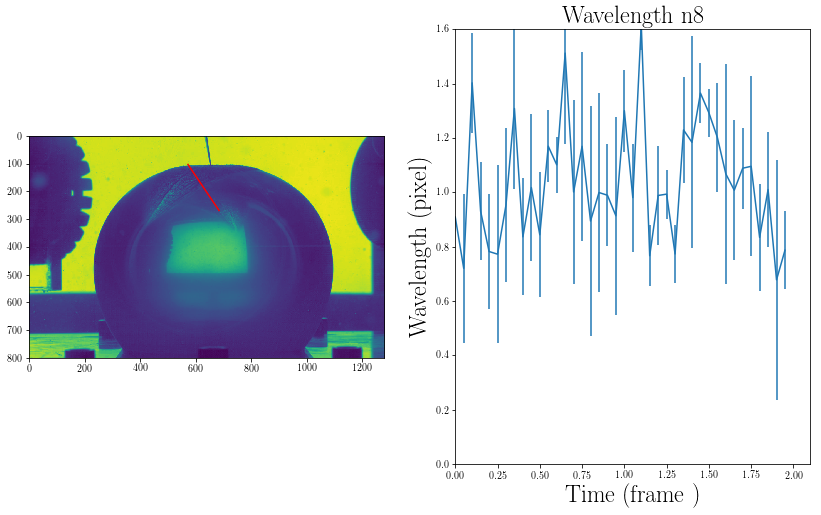

In [353]:
figs = {}
for i,c in enumerate(call):
    t0 = 20
    tlist = range(t0,60)
    slist = [30,50,60,60]+[60]*(len(tlist)-4)

    print(c)
    La = []
    stdLa = []
    for (t,s0) in zip(tlist,slist):
        (l,stdl) = compute_wavelength(D_0,c,t,s0)
    
        La.append(l)
        stdLa.append(stdl)
    
    t = (np.asarray(tlist)-t0)*dt
    La = np.asarray(La)*fx
    stdLa = np.asarray(stdLa)*fx
    
    fig = plt.figure(i+1)
    fig.set_size_inches(14,8)
    plt.subplot(1,2,2)
    plt.errorbar(t,La,stdLa)
    plt.axis([0,2.1,0,1.6])
    figs.update(graphes.legende('Time (frame #)','Wavelength (pixel)','Wavelength n'+str(i),cplot=True,show=False))
    
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(D_0['im'][t0,:,:]))
    plt.plot([c['g'][0],c['g'][1]],[c['g'][2],c['g'][3]],'r')

    graphes.save_figs(figs,savedir=fsave+'Multimeasurement/',prefix='Serie')

Data not saved


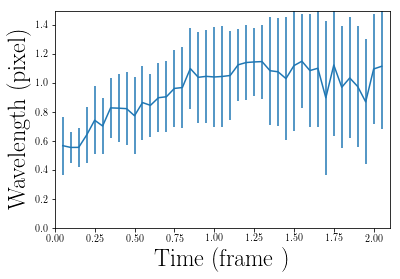

In [291]:
t0 = 18
##for t in range(19,60):
plt.errorbar(t,La,stdLa)
plt.axis([0,2.1,0,1.5])
figs.update(graphes.legende('Time (frame #)','Wavelength (pixel)','',show=False))
graphes.save_figs(figs,savedir=folder)
#graphes.set_axis(18,60,0,15)
#graphes.errorbar(,[0]*len(La),stdLa*fx,label='')
figs = {}


In [344]:
def compute_wavelength(D_0,c,i,s0,display=False):
    (nt,nx,ny) = D_0['im'].shape
    
    x = np.arange(nx)
    y = np.arange(ny)
    f = scipy.interpolate.RectBivariateSpline(x,y,D_0['im'][i,:,:])

    N=100
    x0 = c['g'][0]
    x1 = c['g'][1]
    y0 = c['g'][2]
    y1 = c['g'][3]
    L = np.sqrt((x1-x0)**2+(y1-y0)**2)
    
    t = np.linspace(0,1,N)
    xi = x0 + t*(x1-x0)
    yi = y0 + t*(y1-y0)
    s = t*L

    val = np.squeeze([f(x,y) for (x,y) in zip(xi,yi)])

    imax = max_local2(val,n=2)
    smax = np.asarray([subpix(val,i,a=2)*L/N for i in imax])

    imin = min_local2(val,n=2)
    smin = np.asarray([subpix(val,i,a=2)*L/N for i in imin])

    if display:
        plt.plot(s,val)
        plt.plot(smax,val[imax],'rx')
        plt.plot(smin,val[imin],'bo')

#position de la borne sup. Dépend de l'instant considéré
    lmax = np.diff(smax[np.logical_and(smax>10,smax<s0)])
    lmin = np.diff(smin[np.logical_and(smin>10,smin<s0)])

    l1 =np.mean(lmax)
    stdl1 = np.std(lmax)

    l2 = np.mean(lmin)
    stdl2 = np.std(lmin)

    l = (l1+l2)/2
    stdl = (stdl1+stdl2)/2/np.sqrt(len(lmax)) 
    
    #print(stdl)
    #print(l)
    return (l,stdl)

#print(np.diff(smax[smax<s0]))
#print(np.diff(smin)[smax<s0])

In [87]:
def max_local(y,a=1):
    indices = np.squeeze(np.where(np.logical_and(y[a:-a]>y[a+a:],y[a:-a]>y[:-a-a])))+a
    return indices

def min_local(y,a=1):
    n = len(y)-a+1
    indices = np.squeeze(np.where(np.logical_and(y[a:-a]<y[a+a:n],y[a:-a]<y[a-1:-a-1])))+a
    return indices

In [131]:
def max_local2(y,n=3):
    B = (y>=0)
    for a in range(1,n+1):
        Ba = [False]*a+np.ndarray.tolist(np.logical_and(y[a:-a]>y[a+a:],y[a:-a]>y[:-a-a]))+[False]*a
        B = np.logical_and(Ba,B)
        
    indices = np.squeeze(np.where(B))
    return indices

def min_local2(y,n=3):
    B = (y>=0)
    for a in range(1,n+1):
        Ba = [False]*a+np.ndarray.tolist(np.logical_and(y[a:-a]<y[a+a:],y[a:-a]<y[:-a-a]))+[False]*a
        B = np.logical_and(Ba,B)
        
    indices = np.squeeze(np.where(B))
    return indices

def subpix(y,i,a=2):
    # find the maximum with subpixel accuracy using parabolic fittin
    xp = np.arange(-a,a+1)
    yp = y[i-a:i+a+1]
    
    p = np.polyfit(xp,yp,2)
    x0 = -p[1]/(2*p[0])
    return x0+i

[[445.         292.        ]
 [507.09892648 371.48300132]
 [693.39570593 225.93200527]
 [631.29677944 146.44900396]]


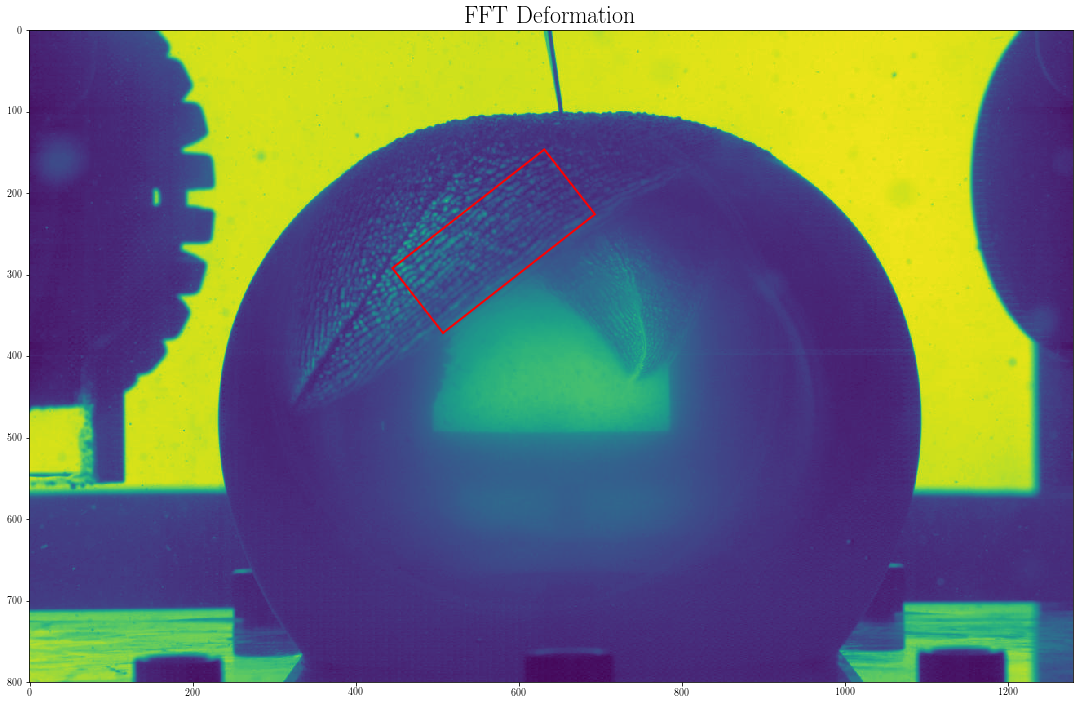

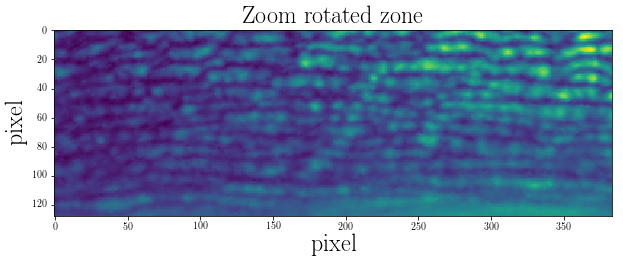

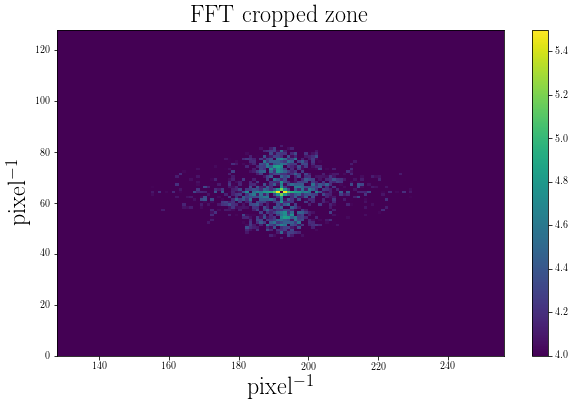

In [68]:
# mesure 2D de la longueur d'onde au cours du temps
import matplotlib.patches as patches

i=25

fig,ax = plt.subplots(1)
ax.imshow(np.transpose(D_0['im'][i,:,:]))
fig.set_size_inches(20,12)

(x0,y0) = (445,292)
theta = 38*np.pi/180 #orientation angle in radian
Lx = 128*np.cos(theta)
Ly = 384*np.sin(theta)
Corners = np.zeros((4,2));
Corners[:,0] = [x0,x0+Lx*np.sin(theta),x0+Lx*np.sin(theta)+Ly*np.cos(theta),x0+Ly*np.cos(theta)] 
Corners[:,1] = [y0,y0+Lx*np.cos(theta),y0+Lx*np.cos(theta)-Ly*np.sin(theta),y0-Ly*np.sin(theta)]
print(Corners)

rect = patches.Polygon(Corners,linewidth=2,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


(nt,nx,ny) = D_0['im'].shape
    
x = np.arange(nx)
y = np.arange(ny)
    
f = scipy.interpolate.RectBivariateSpline(x,y,D_0['im'][i,:,:])


Nx=int(Lx/np.cos(theta))
Ny=int(Ly/np.sin(theta))

slist = np.linspace(0,1,Ny)
t = np.linspace(0,1,Nx)
    
val = np.zeros((Nx,Ny))

for j,s in enumerate(slist):
    x0 = s*Corners[0,0]+(1-s)*Corners[3,0]
    x1 = s*Corners[1,0]+(1-s)*Corners[2,0]
    y0 = s*Corners[0,1]+(1-s)*Corners[3,1]
    y1 = s*Corners[1,1]+(1-s)*Corners[2,1]

    xi = x0 + t*(x1-x0)
    yi = y0 + t*(y1-y0)
    
    val[:,j] = np.squeeze([f(x,y) for (x,y) in zip(xi,yi)])
    
#    plt.plot([x0,x1],[y0,y1],'r')

figs = {}
figs.update(graphes.legende('','','FFT Deformation',cplot=True,show=False))


fig,ax = plt.subplots(1)
fig.set_size_inches(10,6)
ax.imshow(val)
figs.update(graphes.legende('pixel','pixel','Zoom rotated zone',cplot=True,show=False))


kx = np.arange(-Nx/2,Nx/2)
ky = np.arange(-Ny/2,Ny/2)
(Kx,Ky)=np.meshgrid(kx,ky)

S0 = np.mean(val,axis=(0,1))

TF = np.abs(np.fft.fftshift(np.fft.fft2(val-S0)))
fig,ax = plt.subplots(1)
fig.set_size_inches(10,6)

plt.pcolormesh(np.log10(TF),vmin=4,vmax=5.5)
plt.colorbar()
figs.update(graphes.legende('pixel$^{-1}$','pixel$^{-1}$','FFT cropped zone',cplot=True,show=False))

a=64
plt.axis([Ny/2-a,Ny/2+a,Nx/2-a,Nx/2+a])

graphes.save_figs(figs,savedir=fsave+'/FFT/',suffix='Frame'+str(i))
#    fig2,ax2 = plt.subplots(1)
#    plt.plot(t,val)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


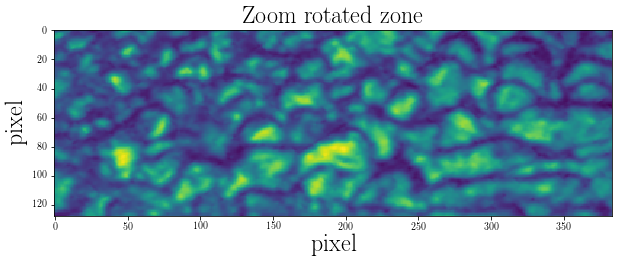

In [72]:
# mesure 2D de la longueur d'onde au cours du temps
import matplotlib.patches as patches

(x0,y0) = (445,292)
theta = 38*np.pi/180 #orientation angle in radian
Lx = 128*np.cos(theta)
Ly = 384*np.sin(theta)
Corners = np.zeros((4,2));
Corners[:,0] = [x0,x0+Lx*np.sin(theta),x0+Lx*np.sin(theta)+Ly*np.cos(theta),x0+Ly*np.cos(theta)] 
Corners[:,1] = [y0,y0+Lx*np.cos(theta),y0+Lx*np.cos(theta)-Ly*np.sin(theta),y0-Ly*np.sin(theta)]
#rect = patches.Polygon(Corners,linewidth=2,edgecolor='r',facecolor='none')
# Add the patch to the Axes
#ax.add_patch(rect)

Nx=int(Lx/np.cos(theta))
Ny=int(Ly/np.sin(theta))

slist = np.linspace(0,1,Ny)
t = np.linspace(0,1,Nx)
val = np.zeros((Nx,Ny))

fig,ax = plt.subplots(1)
fig.set_size_inches(10,6)
    
for i in range(10,60):
    print(i)
    figs = {}

    (nt,nx,ny) = D_0['im'].shape    
    x = np.arange(nx)
    y = np.arange(ny)
    
    f = scipy.interpolate.RectBivariateSpline(x,y,D_0['im'][i,:,:])

    for j,s in enumerate(slist):
        x0 = s*Corners[0,0]+(1-s)*Corners[3,0]
        x1 = s*Corners[1,0]+(1-s)*Corners[2,0]
        y0 = s*Corners[0,1]+(1-s)*Corners[3,1]
        y1 = s*Corners[1,1]+(1-s)*Corners[2,1]

        xi = x0 + t*(x1-x0)
        yi = y0 + t*(y1-y0)
    
        val[:,j] = np.squeeze([f(x,y) for (x,y) in zip(xi,yi)])
    
#    plt.plot([x0,x1],[y0,y1],'r')
    ax.cla()
    ax.imshow(val)
    
    figs.update(graphes.legende('pixel','pixel','Zoom rotated zone',cplot=True,show=False))
    graphes.save_figs(figs,savedir=fsave+'/FFT/',suffix='Frame'+str(i),frmt='png')
#    fig2,ax2 = plt.subplots(1)
#    plt.plot(t,val)

In [15]:
#estimate of the shear
U_0 = 30 #in m/s
t0 = 10**-3 # shear time in s
nu = 10**-6
delta = np.sqrt(nu*t0)
eta = U_0/(np.sqrt(np.pi)*delta)
print(eta)
print(delta)

535237.234846
3.16227766017e-05
